# Esercitazione 11
L'esercitazione 11 richiede l'implementazione di una rete neurale attraverso la libreria _Keras_ di Python per il fitting di funzioni. 

## Esercizio 11.1
L'esercizio richiede che si studi il comportamento della rete neurale al variare dei suoi parametri: il numero di epoche $N_{epoch}$, di dati di allenamento $N_{train}$ e di rumore $\sigma$ sugli stessi. Ho creato quattro diversi modelli, con diverse combinazioni di $N_{epoch}$, $N_{train}$ e $\sigma$, per il calcolo della regressione lineare su dati del tipo $y=2x+1$ (a cui applicare il rumore gaussiano). Dato che è un fit lineare, ciascun modello ha bisogno di un solo neurone, senza alcuna funzione di attivazione. Ogni modello ha poi un numero di dati di validazione pari al 10% dei dati di training.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

2023-10-30 14:24:00.283352: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-30 14:24:00.431443: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-30 14:24:00.432353: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-30 14:24:01.621936: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Modello 1: $\sigma=0.5$,  $N_{train}=500$, $N_{epoch}=30$

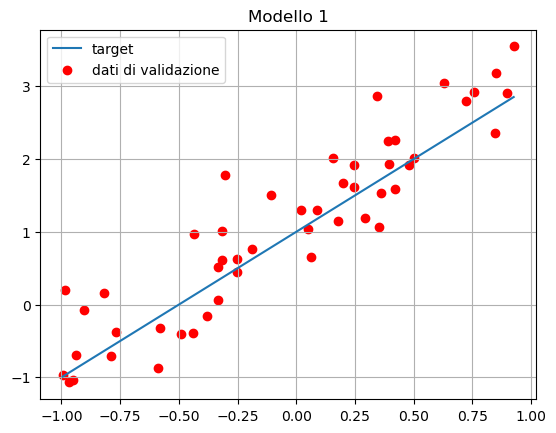

In [2]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='dati di validazione')
plt.legend()
plt.grid(True)
plt.title('Modello 1')
plt.show()

In [3]:
model1 = tf.keras.Sequential()
model1.add(Dense(1, input_shape=(1,)))

model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model1.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid), verbose=0)

# evaluate model
score1 = model1.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

2/2 [==============================] - 0s 5ms/step - loss: 0.2795 - mse: 0.2795


4/4 [==============================] - 0s 2ms/step


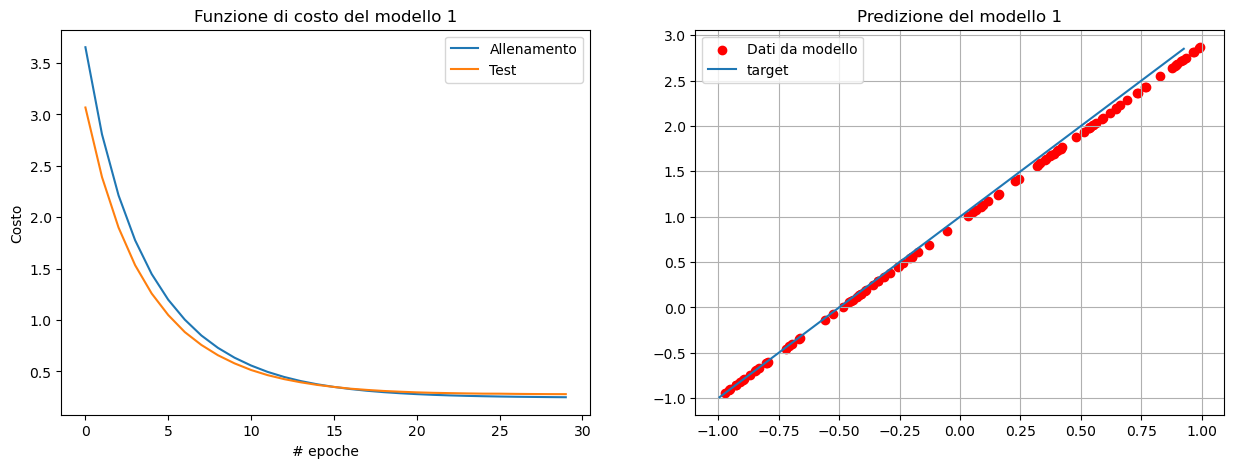

In [4]:
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))

ax0.plot(history.history['loss'])
ax0.plot(history.history['val_loss'])
ax0.set_title('Funzione di costo del modello 1')
ax0.set_ylabel('Costo')
ax0.set_xlabel('# epoche')
ax0.legend(['Allenamento', 'Test'], loc='best')


x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model1.predict(x_predicted)
ax1.set_title('Predizione del modello 1')
ax1.scatter(x_predicted, y_predicted,color='r', label='Dati da modello')
ax1.plot(x_valid, y_target, label='target')
ax1.grid(True)
ax1.legend()

plt.show()


### Modello 2: $\sigma=0.8$,  $N_{train}=500$, $N_{epoch}=30$

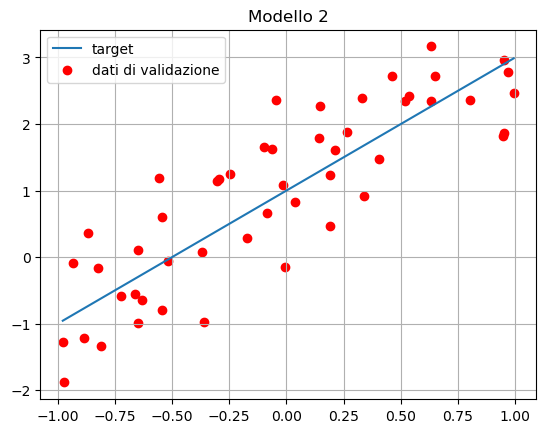

In [5]:
# generate training inputs
np.random.seed(1)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.8 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='dati di validazione')
plt.legend()
plt.grid(True)
plt.title('Modello 2')
plt.show()

In [6]:
model2 = tf.keras.Sequential()
model2.add(Dense(1, input_shape=(1,)))

model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model2.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid), verbose=0)

# evaluate model
score2 = model2.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

2/2 [==============================] - 0s 6ms/step - loss: 0.4637 - mse: 0.4637


4/4 [==============================] - 0s 2ms/step


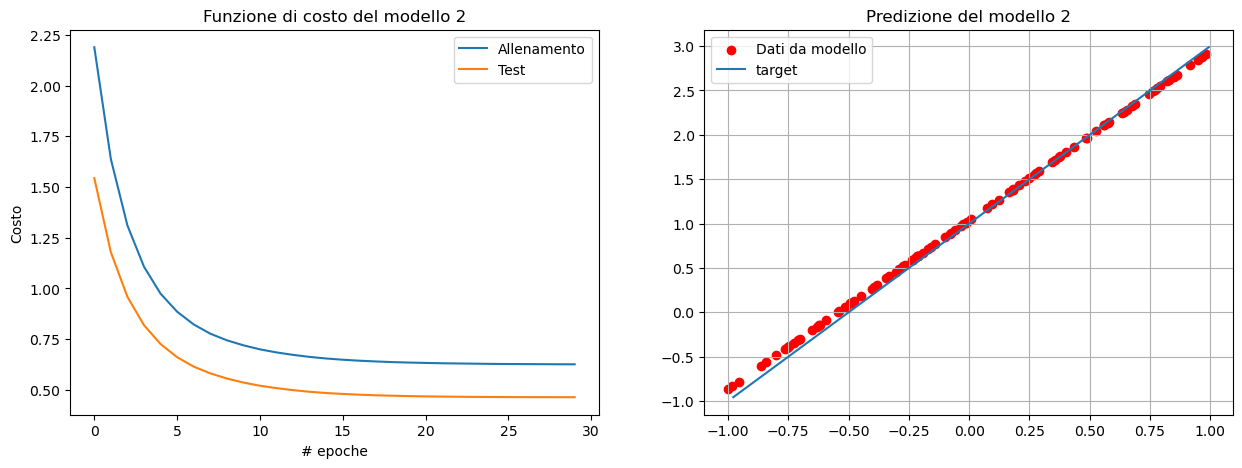

In [7]:
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))

ax0.plot(history.history['loss'])
ax0.plot(history.history['val_loss'])
ax0.set_title('Funzione di costo del modello 2')
ax0.set_ylabel('Costo')
ax0.set_xlabel('# epoche')
ax0.legend(['Allenamento', 'Test'], loc='best')


x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model2.predict(x_predicted)
ax1.set_title('Predizione del modello 2')
ax1.scatter(x_predicted, y_predicted,color='r', label='Dati da modello')
ax1.plot(x_valid, y_target, label='target')
ax1.grid(True)
ax1.legend()

plt.show()

### Modello 3: $\sigma=0.8$,  $N_{train}=800$, $N_{epoch}=30$

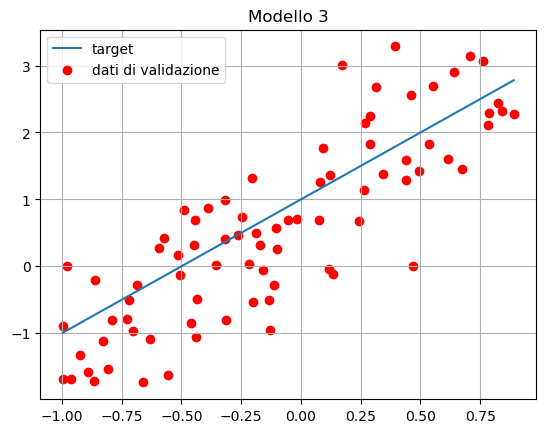

In [8]:
# generate training inputs
np.random.seed(2)
x_train = np.random.uniform(-1, 1, 800)
x_valid = np.random.uniform(-1, 1, 80)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.8 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='dati di validazione')
plt.legend()
plt.grid(True)
plt.title('Modello 3')
plt.show()

In [9]:
model3 = tf.keras.Sequential()
model3.add(Dense(1, input_shape=(1,)))

model3.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model3.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid), verbose=0)

# evaluate model
score3 = model3.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

3/3 [==============================] - 0s 3ms/step - loss: 0.5729 - mse: 0.5729


4/4 [==============================] - 0s 2ms/step


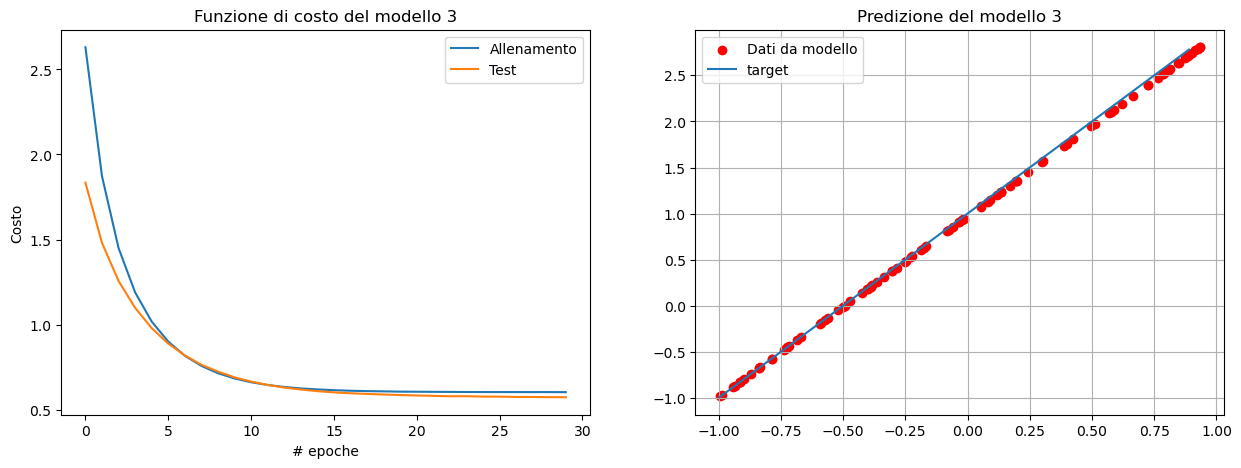

In [10]:
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))

ax0.plot(history.history['loss'])
ax0.plot(history.history['val_loss'])
ax0.set_title('Funzione di costo del modello 3')
ax0.set_ylabel('Costo')
ax0.set_xlabel('# epoche')
ax0.legend(['Allenamento', 'Test'], loc='best')


x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model3.predict(x_predicted)
ax1.set_title('Predizione del modello 3')
ax1.scatter(x_predicted, y_predicted,color='r', label='Dati da modello')
ax1.plot(x_valid, y_target, label='target')
ax1.grid(True)
ax1.legend()

plt.show()

### Modello 4: $\sigma=0.5$,  $N_{train}=500$, $N_{epoch}=50$

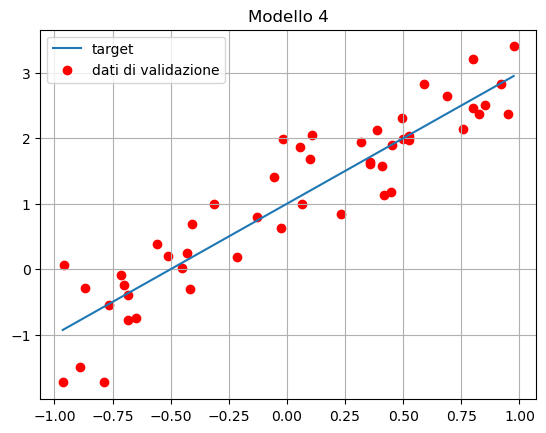

In [11]:
# generate training inputs
np.random.seed(3)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='dati di validazione')
plt.legend()
plt.grid(True)
plt.title('Modello 4')
plt.show()

In [12]:
model4 = tf.keras.Sequential()
model4.add(Dense(1, input_shape=(1,)))

model4.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model4.fit(x=x_train, y=y_train, batch_size=32, epochs=50, shuffle=True, validation_data=(x_valid, y_valid), verbose=0)

# evaluate model
score4 = model4.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

2/2 [==============================] - 0s 7ms/step - loss: 0.2360 - mse: 0.2360


4/4 [==============================] - 0s 2ms/step


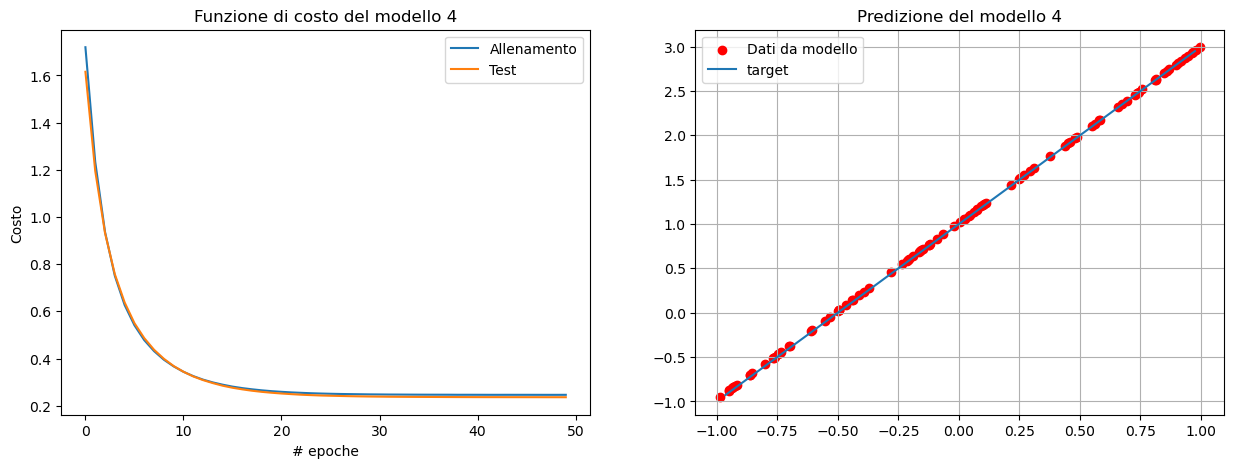

In [13]:
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))

ax0.plot(history.history['loss'])
ax0.plot(history.history['val_loss'])
ax0.set_title('Funzione di costo del modello 4')
ax0.set_ylabel('Costo')
ax0.set_xlabel('# epoche')
ax0.legend(['Allenamento', 'Test'], loc='best')


x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model4.predict(x_predicted)
ax1.set_title('Predizione del modello 4')
ax1.scatter(x_predicted, y_predicted,color='r', label='Dati da modello')
ax1.plot(x_valid, y_target, label='target')
ax1.grid(True)
ax1.legend()

plt.show()


In [14]:
print("Costo modello 1: " + str(round(score1[0],2)))
print("Costo modello 2: " + str(round(score2[0],2)))
print("Costo modello 3: " + str(round(score3[0],2)))
print("Costo modello 4: " + str(round(score4[0],2)))

Costo modello 1: 0.28
Costo modello 2: 0.46
Costo modello 3: 0.57
Costo modello 4: 0.24


Dai valori delle funzioni costo dei diversi modelli posso vedere che, data la semplicità del problema, il miglior fit si ha con l'aumento di epoche, mentre l'aumento del rumore e del numero di dati peggiora la predizione: si può infatti vedere, prendendo ad esempio il modello 3, che molti dati con molto rumore hanno più possibilità di adattarsi a varianti della funzione target.

## Esercizio 11.2

Nell'esercizio 11.2 devo costruire una rete neurale che si in grado di fare un fit di una funzione polinomiale di 3° grado. Per tale motivo, la rete neurale non può più essere costituita da un solo neurone (altrimenti sarebbe confinata ad un fit lineare), e di conseguenza necessita di implementazione di una funzione di attivazione per i neuroni.

Perr prima cosa, ho generato i dati di training e di validazione, in rapporto di 10:1, a partire dalla funzione polinomiale. Ho aggiunto un rumore gaussiano di $\sigma=0.2$.

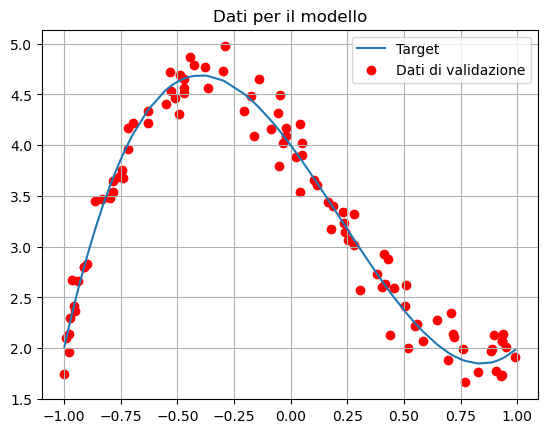

In [2]:
def f(x):
    return 4-3*x-2*x**2+3*x**3

np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = f(x_valid)

sigma = 0.2 # noise standard deviation
y_train = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid), sigma)

# plot validation and target dataset
plt.plot(x_valid, y_target, label='Target')
plt.scatter(x_valid, y_valid, color='r', label='Dati di validazione')
plt.legend()
plt.grid(True)
plt.title('Dati per il modello')
plt.show()


Dato che un generico polinomio di 3° grado $ax^3+bx^2+cx+d$ dipende da 4 parametri, ho scelto di costruire una rete neurale con un solo layer nascosto di 4 neuroni. Come funzione di attivazione ho scelto la funzione _ReLU_, che è la più semplice. Tuttavia, per impedire che i neuroni si spegnessero completamente (cosa che succede alla _ReLU_ se ha un feed sotto il suo threshold), ho scelto di usare _LeakyReLU_, che evita lo spegnimento completo (se il feed è sotto il threshold, restituisce un segnale smorzato ma non nullo). Ho scelto l'errrore quadratico medio come funzione costo e come optimizer ho preferito Adam al più semplice Stochastic Gradient Descent perché è ottimizzato per l'utilizzo in reti neurali. Ad Adam, su consiglio di chatGPT, ho passato un  parametro di apprendimento, così da evitare una convergenza troppo rapida a soluzioni solo locali.

In [19]:
from keras.optimizers import Adam

model = tf.keras.Sequential()
model.add(Dense(2, input_shape=(1,), activation='tanh'))
#model.add(Dense(4, activation='LeakyReLU')) #OPZIONE PER VEDERE COME MIGLIORA NEL CASO DI RETE PIÙ PROFONDA
model.add(Dense(1))

#model.compile(loss='mse', optimizer='sgd', metrics=['mse'])
model.compile(loss='mse', optimizer=Adam(lr=0.01), metrics=['mse'])
model.summary()
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=100, shuffle=True, validation_data=(x_valid, y_valid))



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 2)                 4         
                                                                 
 dense_17 (Dense)            (None, 1)                 3         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
32/32 [==============================] - 1s 9ms/step - loss: 11.2156 - mse: 11.2156 - val_loss: 7.5945 - val_mse: 7.5945
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 6.1330 - mse: 6.1330 - val_loss: 3.3756 - val_mse: 3.3756
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 2.3796 - mse: 2.3796 - val_loss: 1.0233 - val_mse: 1.0233
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8200 - mse: 0.8200 - val_loss: 0.4854 - val_mse: 0.4854
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4219 - mse: 0.4219 - val_loss: 0.4311 - val_mse: 0.4311
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3321 - mse: 0.3321 - val_loss: 0.4360 - val_mse: 0.4360
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3055 - mse: 0.3055 - val_loss: 0.4340 - val_mse: 0.4340
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2897 -

4/4 [==============================] - 0s 2ms/step


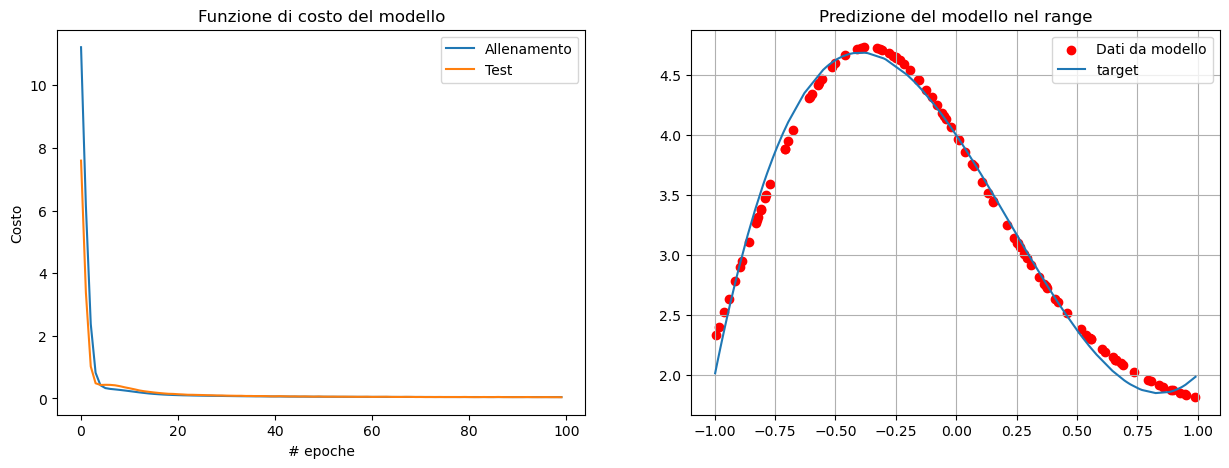

In [20]:
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))

ax0.plot(history.history['loss'])
ax0.plot(history.history['val_loss'])
ax0.set_title('Funzione di costo del modello')
ax0.set_ylabel('Costo')
ax0.set_xlabel('# epoche')
ax0.legend(['Allenamento', 'Test'], loc='best')


x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax1.set_title('Predizione del modello nel range')
ax1.scatter(x_predicted, y_predicted,color='r', label='Dati da modello')
ax1.plot(x_valid, y_target, label='target')
ax1.grid(True)
ax1.legend()

plt.show()

Nonostante rete neurale sia relativamente semplice, il modello riesce a predire con buona approssimazione le principali caratteristiche della funzione nell'intervallo, come la pendenza media e i cambi di pendenza. Aggiungendo un layer nascosto aggiuntivo, costruito come il layer precedente, il risultato sarebbe migliorato di molto, mappando anche i vari cambi di concavità, ma avrebbe avuto ugualmente scarse prestazioni fuori range.

7/7 [==============================] - 0s 2ms/step


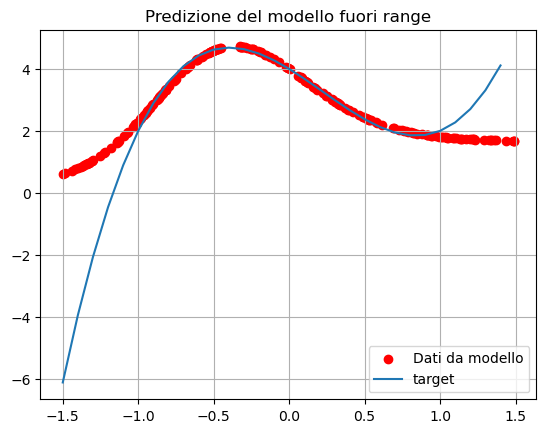

In [21]:
x_predicted = np.random.uniform(-1.5, 1.5, 200)
y_predicted = model.predict(x_predicted)
x_true = np.arange(-1.5,1.5,0.1)
plt.title('Predizione del modello fuori range')
plt.scatter(x_predicted, y_predicted,color='r', label='Dati da modello')
plt.plot(x_true, f(x_true), label='target')
plt.grid(True)
plt.legend()

Come è possibile vedere dal grafico, il modello performa male al di fuori dell'intervallo in cui è sato allenato, com'era prevedibile. Tuttavia,tale problema è comune a reti neurali più complesse di quella utilizzata.

## Esercizio 11.3
La rete neurale dell'esercizio 11.3 deve costruire un fit di una funzione a due variabili, che è sufficientemente complessa e che non è definita da un numero finito di parametri, come la funzione polinomiale dell'esercizio precedente. A tal proposito, si è reso necessario l'utilizzo di una rete neurale più complessa e profonda di quella usata in precedenza. Come prima, il rapporto tra dati di training e di validazione è di 10:1.

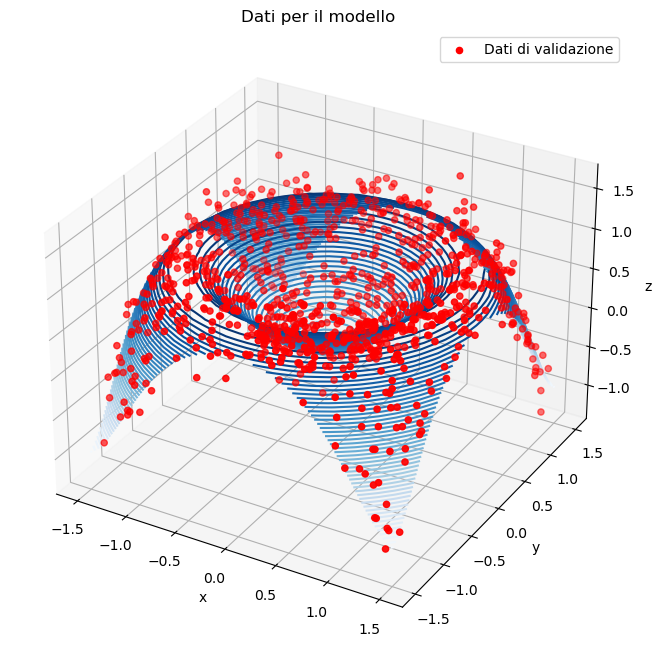

In [59]:
from mpl_toolkits import mplot3d

def F(x, y):
    return np.sin(x**2+ y**2)

np.random.seed(0)
data_train = np.random.uniform(-1.5, 1.5, size=(10000, 2))
data_valid = np.random.uniform(-1.5, 1.5, size=(1000, 2))
#data_valid.sort()

z_target = F(data_valid[:,0], data_valid[:,1]) 

sigma = 0.2
z_train = np.random.normal(F(data_train[:,0], data_train[:,1]), sigma)
z_valid = np.random.normal(z_target, sigma)


#PLOT
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.set_title('Dati per il modello')

x = np.linspace(-1.5, 1.5, 30)
y = np.linspace(-1.5, 1.5, 30)
X, Y = np.meshgrid(x, y)
Z = F(X, Y)
ax.contour3D(X, Y, Z, 50, cmap='Blues')
ax.scatter(data_valid[:,0], data_valid[:,1],z_valid, color='r', label='Dati di validazione')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()

plt.show()

In [56]:
model = tf.keras.Sequential()
model.add(Dense(32, activation='LeakyReLU', input_shape=(2,)))
model.add(Dense(32, activation='LeakyReLU'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.summary()
history = model.fit(x=data_train, y=z_train, batch_size=32, epochs=100, shuffle=True, validation_data=(data_valid, z_valid))

Model: "sequential_24"
_________________________________________________________________


 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 32)                96        
                                                                 
 dense_49 (Dense)            (None, 32)                1056      
                                                                 
 dense_50 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
313/313 [==============================] - 4s 6ms/step - loss: 0.2053 - mse: 0.2053 - val_loss: 0.1687 - val_mse: 0.1687
Epoch 2/100
313/313 [==============================] - 1s 4ms/step - loss: 0.1595 - mse: 0.1595 - val_loss: 0.1502 - val_mse: 0.1502
Epoch 3/100
313/313 [==============================] - 1s 4ms/step - loss: 0.1396 - mse: 0.1396 - val_loss: 0.1302 - val_mse: 0.1302
Epoch

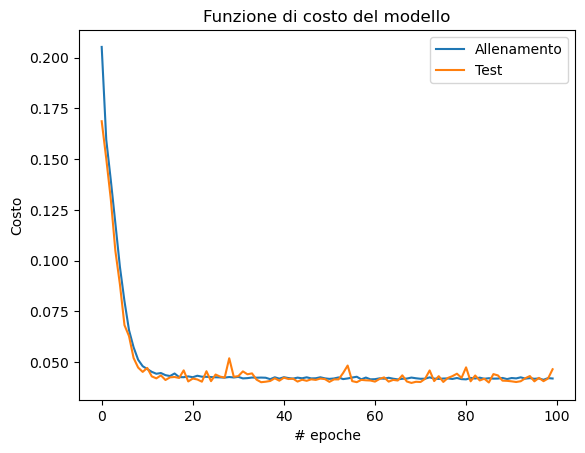

16/16 [==============================] - 0s 3ms/step


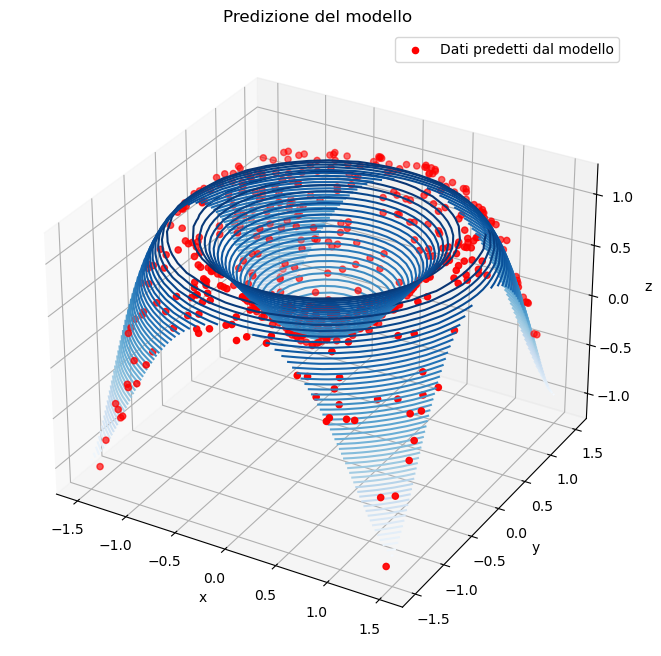

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Funzione di costo del modello')
plt.ylabel('Costo')
plt.xlabel('# epoche')
plt.legend(['Allenamento', 'Test'], loc='best')

plt.show()

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.set_title('Predizione del modello')
x = np.linspace(-1.5, 1.5, 30)
y = np.linspace(-1.5, 1.5, 30)
X, Y = np.meshgrid(x, y)
Z = F(X, Y)
ax.contour3D(X, Y, Z, 50, cmap='Blues')

data_pred = np.random.uniform(-1.5, 1.5, size=(500,2))
ax.scatter(data_pred[:,0], data_pred[:,1],model.predict(data_pred), color='r', label='Dati predetti dal modello')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()

plt.show()